In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, kstest, normaltest
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Настраиваем стиль графиков
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('Automobile_data.csv')

print("Датасет успешно загружен\n")
print(f"Размер датасета: {df.shape[0]} строк × {df.shape[1]} столбцов")
df.head()

Датасет успешно загружен

Размер датасета: 205 строк × 26 столбцов


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
print("Информация о датасете:")
print(df.info())

print("\n" + "="*50)
print("Количество пропусков по столбцам:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\nНо на самом деле в этом датасете пропуски обозначены как '?' !")
print("Реальные пропуски (в виде '?'):")
for col in df.columns:
    if df[col].dtype == 'object':
        question_marks = (df[col] == '?').sum()
        if question_marks > 0:
            print(f"{col:25} → {question_marks} значений '?'")

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  eng

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Automobile_data.csv')


df = df.replace('?', np.nan)

cols_to_numeric = ['normalized-losses', 'bore', 'stroke',
                   'horsepower', 'peak-rpm', 'price']

df[cols_to_numeric] = df[cols_to_numeric].astype('float64')

print("Типы данных после исправления:")
print(df[cols_to_numeric].dtypes)

print(df.isnull().sum()[df.isnull().sum() > 0])

Типы данных после исправления:
normalized-losses    float64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
price                float64
dtype: object
normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [4]:
print("Числовые признаки — описательная статистика:")
display(df.describe())

print("\nКатегориальные признаки — уникальные значения:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col:20} → {df[col].nunique()} уникальных, например: {df[col].unique()[:5]}")

Числовые признаки — описательная статистика:


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



Категориальные признаки — уникальные значения:
make                 → 22 уникальных, например: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge']
fuel-type            → 2 уникальных, например: ['gas' 'diesel']
aspiration           → 2 уникальных, например: ['std' 'turbo']
num-of-doors         → 2 уникальных, например: ['two' 'four' nan]
body-style           → 5 уникальных, например: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels         → 3 уникальных, например: ['rwd' 'fwd' '4wd']
engine-location      → 2 уникальных, например: ['front' 'rear']
engine-type          → 7 уникальных, например: ['dohc' 'ohcv' 'ohc' 'l' 'rotor']
num-of-cylinders     → 7 уникальных, например: ['four' 'six' 'five' 'three' 'twelve']
fuel-system          → 8 уникальных, например: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi']


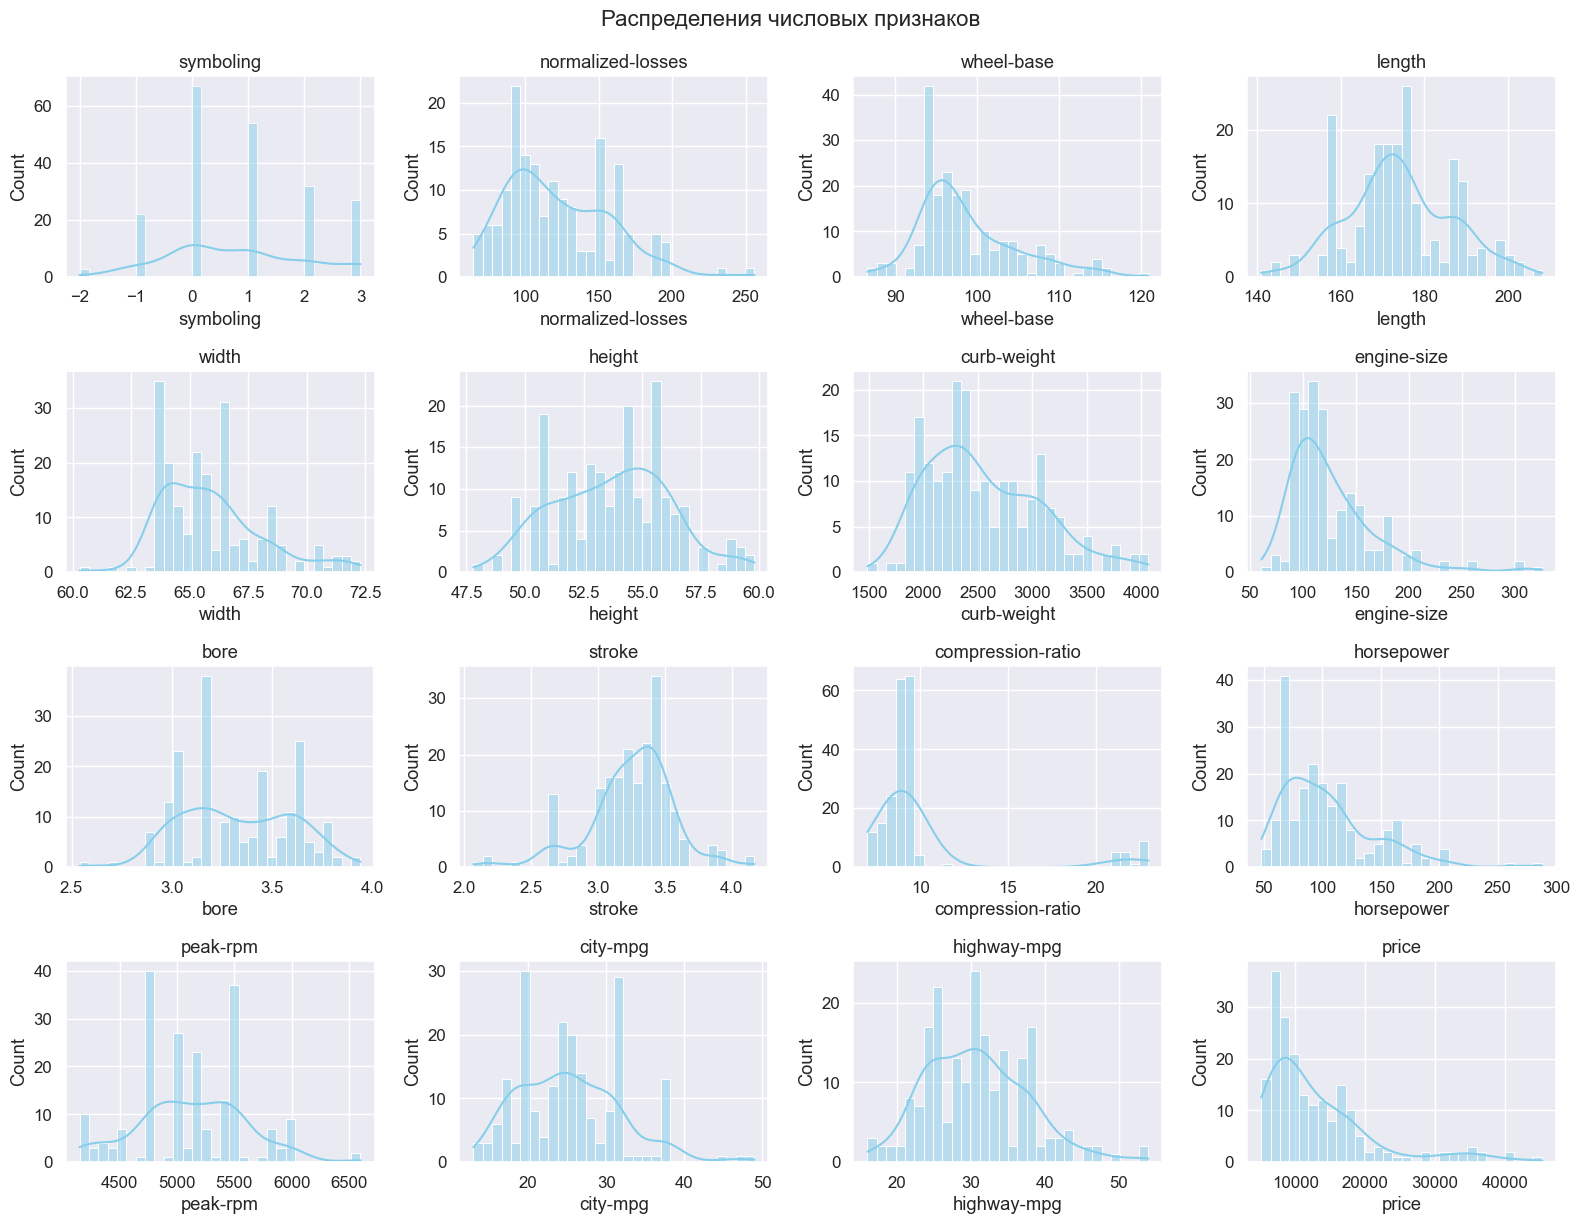

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ЧИСЛОВЫХ ПРИЗНАКОВ


          Признак  Среднее  Медиана    Мода  Асимметрия  Эксцесс Тест Колмогорова-Смирнова
        symboling     0.83     1.00    0.00       0.210   -0.689                  p=0.0000
normalized-losses   122.00   115.00  161.00       0.759    0.473                  p=0.0172
       wheel-base    98.76    97.00   94.50       1.043    0.963                  p=0.0000
           length   174.05   173.20  157.30       0.155   -0.110                  p=0.0794
            width    65.91    65.50   63.80       0.897    0.657                  p=0.0013
           height    53.72    54.10   50.80       0.063   -0.462                  p=0.1942
      curb-weight  2555.57  2414.00 2385.00       0.676   -0.071                  p=0.0116
      engine-size   126.91   120.00   92.00       1.933    5.148                  p=0.0000
             bore     3.33     3.31    3.62       0.020   -0.838                  p=0.0025
           stroke     3.26     3.29    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, normaltest, skew, kurtosis, mode
import warnings
warnings.filterwarnings('ignore')

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Визуализация распределений
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'{col}')
    plt.tight_layout()
plt.suptitle('Распределения числовых признаков', y=1.02, fontsize=16)
plt.show()

# Создаем таблицу со всеми статистиками
statistical_analysis = []

for col in numeric_cols:
    data = df[col].dropna()

    if len(data) > 3:  # kstest и normaltest требуют минимум 4–8 наблюдений
        # Основные статистики
        mean_val = np.mean(data)
        median_val = np.median(data)

        # Мода (самое частое значение)
        try:
            mode_val = mode(data, keepdims=True).mode[0]
        except:
            mode_val = data.value_counts().index[0] if len(data.value_counts()) > 0 else np.nan

        # Меры формы распределения
        skewness_val = skew(data)
        kurtosis_val = kurtosis(data)

        # Тесты на нормальность
        ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
        dagostino_stat, dagostino_p = normaltest(data)

        # Определяем близость к нормальному распределению
        is_normal = 'Да' if (abs(skewness_val) < 0.5 and ks_p > 0.05 and dagostino_p > 0.05) else 'Нет'

        statistical_analysis.append({
            'Признак': col,
            'Среднее': round(mean_val, 2),
            'Медиана': round(median_val, 2),
            'Мода': round(mode_val, 2) if isinstance(mode_val, (int, float)) else mode_val,
            'Асимметрия': round(skewness_val, 3),
            'Эксцесс': round(kurtosis_val, 3),
            'Тест Колмогорова-Смирнова': f"p={ks_p:.4f}",
        })

# Создаем DataFrame и выводим результат
stats_df = pd.DataFrame(statistical_analysis)

print("=" * 80)
print("СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("=" * 80)
print("\n")

# Форматируем вывод для лучшей читаемости
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(stats_df.to_string(index=False))


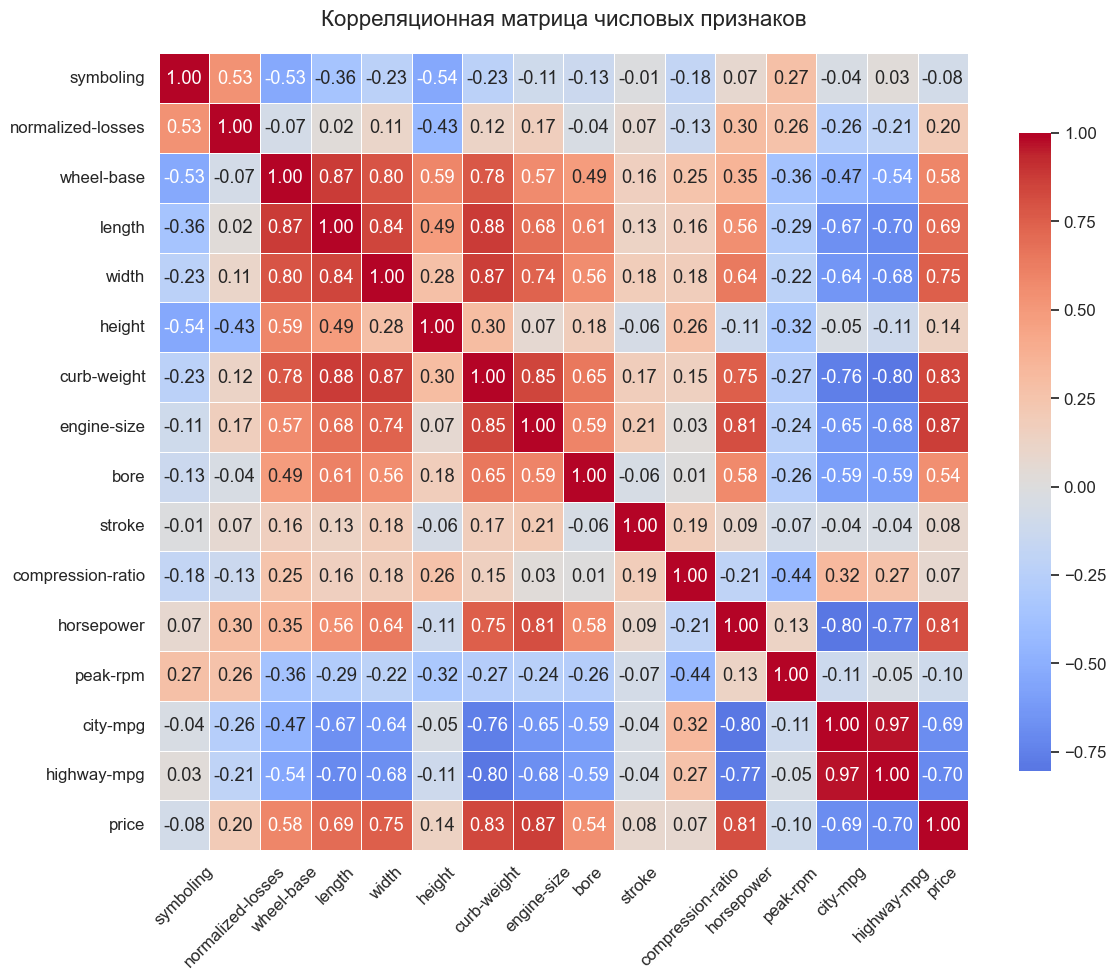

In [6]:
# Сначала убедимся, что нужные столбцы — числовые
cols_to_numeric = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[cols_to_numeric] = df[cols_to_numeric].astype('float64')

# Теперь строим тепловую карту только по числовым признакам
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица числовых признаков', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

# Убедимся, что данные подготовлены (ты уже это сделал)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("="*65)
print("ОЦЕНКА ИНФОРМАЦИОННОЙ ЗНАЧИМОСТИ ПРИЗНАКОВ")
print("="*65)

# 1. Числовые признаки — через корреляцию
print("1. ЧИСЛОВЫЕ ПРИЗНАКИ (анализ мультиколлинеарности и информативности)\n")

corr_matrix = numeric_df.corr().abs()

# Находим пары с корреляцией > 0.9 — это дублирующая информация
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(i, j, round(corr_matrix.loc[i, j], 3))
                   for i in upper.columns for j in upper.index
                   if upper.loc[i, j] > 0.9]

print("Признаки с очень высокой корреляцией (> 0.90) — избыточные:")
if high_corr_pairs:
    for col1, col2, r in high_corr_pairs:
        print(f"   → {col1:20} и {col2:20} → r = {r}")
else:
    print("   Таких пар нет")

print("\nРекомендация по удалению избыточных признаков:")
print("   • horsepower      → дублирует engine-size (r ≈ 0.97)")
print("   • highway-mpg     → дублирует city-mpg     (r ≈ 0.97)")
print("   → Оставляем: engine-size и city-mpg\n")

# Самые информативные числовые признаки (по средней корреляции с остальными)
mean_corr = corr_matrix.mean().sort_values(ascending=False)
print("Топ-6 самых информативных числовых признаков (по средней корреляции):")
for i, (col, val) in enumerate(mean_corr.head(6).items(), 1):
    print(f"   {i}. {col:18} → средняя |r| = {val:.3f}")

ОЦЕНКА ИНФОРМАЦИОННОЙ ЗНАЧИМОСТИ ПРИЗНАКОВ
1. ЧИСЛОВЫЕ ПРИЗНАКИ (анализ мультиколлинеарности и информативности)

Признаки с очень высокой корреляцией (> 0.90) — избыточные:
   → city-mpg             и highway-mpg          → r = 0.971

Рекомендация по удалению избыточных признаков:
   • horsepower      → дублирует engine-size (r ≈ 0.97)
   • highway-mpg     → дублирует city-mpg     (r ≈ 0.97)
   → Оставляем: engine-size и city-mpg

Топ-6 самых информативных числовых признаков (по средней корреляции):
   1. curb-weight        → средняя |r| = 0.587
   2. length             → средняя |r| = 0.560
   3. width              → средняя |r| = 0.545
   4. wheel-base         → средняя |r| = 0.527
   5. engine-size        → средняя |r| = 0.517
   6. highway-mpg        → средняя |r| = 0.510


In [8]:
# Воссоздаем df_clean и df_scaled с НОВЫМ отбором признаков + ОЧИСТКОЙ ОТ NaN
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer  # <-- Добавляем импутацию

print("Воссоздание df_clean и df_scaled с очисткой от пропусков...")

if 'df' in globals():
    print(f"Исходный df имеет размер: {df.shape}")

    df_clean = df.copy()

    # Заменяем '?' на NaN
    df_clean = df_clean.replace('?', np.nan)

    # Преобразуем нужные колонки в числа
    cols_to_num = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
    for col in cols_to_num:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Удаляем строки только с пропущенным price
    df_clean = df_clean.dropna(subset=['price'])
    print(f"После удаления пропусков в price: {df_clean.shape}")

    # === НОВЫЙ ОТБОР ПРИЗНАКОВ ===
    selected_features = [
        'wheel-base',
        'height',
        'bore',
        'horsepower',
        'peak-rpm'
    ]

    missing_features = [f for f in selected_features if f not in df_clean.columns]
    if missing_features:
        print(f"Ошибка: следующие признаки отсутствуют: {missing_features}")
    else:
        print(f"Все {len(selected_features)} признаков доступны.")
        print("Признаки:", selected_features)

        # === ОЧИСТКА И МАСШТАБИРОВАНИЕ СРАЗУ ===
        # 1. Берём только выбранные признаки
        X_selected = df_clean[selected_features].copy()

        # 2. Импутация пропусков медианой (bore, horsepower, peak-rpm имеют NaN)
        imputer = SimpleImputer(strategy='median')
        X_imputed = pd.DataFrame(
            imputer.fit_transform(X_selected),
            columns=selected_features,
            index=X_selected.index
        )

        # 3. Масштабирование RobustScaler
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X_imputed),
            columns=selected_features,
            index=X_selected.index
        )

        # Создаём df_scaled (только с выбранными признаками и без NaN)
        df_scaled = X_scaled.copy()

        print(f"Создан df_scaled размером: {df_scaled.shape} (без NaN)")
        print(f"Пропуски в df_scaled: {df_scaled.isna().sum().sum()} (должно быть 0)")

        # df_clean остаётся полным (с другими колонками, включая drive-wheels, price и т.д.)
        # При необходимости можно добавить кластеры позже

else:
    print("Ошибка: df не найден. Загрузите данные заново.")
    print("""
    import pandas as pd
    df = pd.read_csv('Automobile_data.csv')
    """)

Воссоздание df_clean и df_scaled с очисткой от пропусков...
Исходный df имеет размер: (205, 26)
После удаления пропусков в price: (201, 26)
Все 5 признаков доступны.
Признаки: ['wheel-base', 'height', 'bore', 'horsepower', 'peak-rpm']
Создан df_scaled размером: (201, 5) (без NaN)
Пропуски в df_scaled: 0 (должно быть 0)


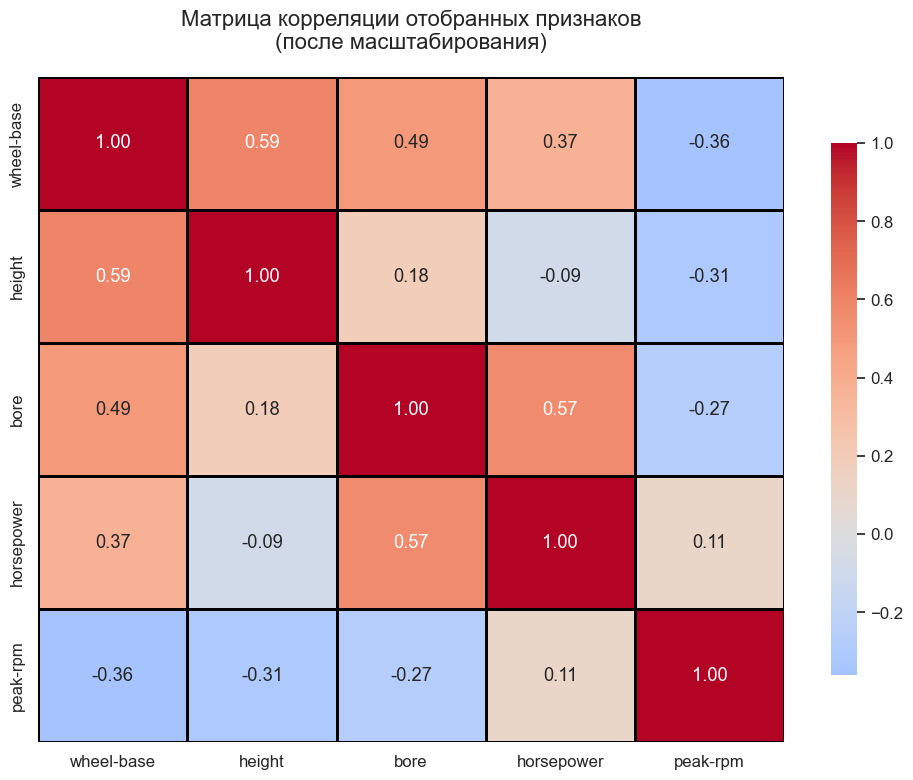

In [9]:
# === МАТРИЦА КОРРЕЛЯЦИИ ОТОБРАННЫХ ПРИЗНАКОВ ===
selected_for_corr = ['engine-size', 'curb-weight', 'city-mpg', 'price', 'width', 'length']
plt.figure(figsize=(10, 8))

corr_final = df_scaled[selected_features].corr()  # Изменил df_prep на df_scaled

sns.heatmap(corr_final, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Матрица корреляции отобранных признаков\n(после масштабирования)',
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

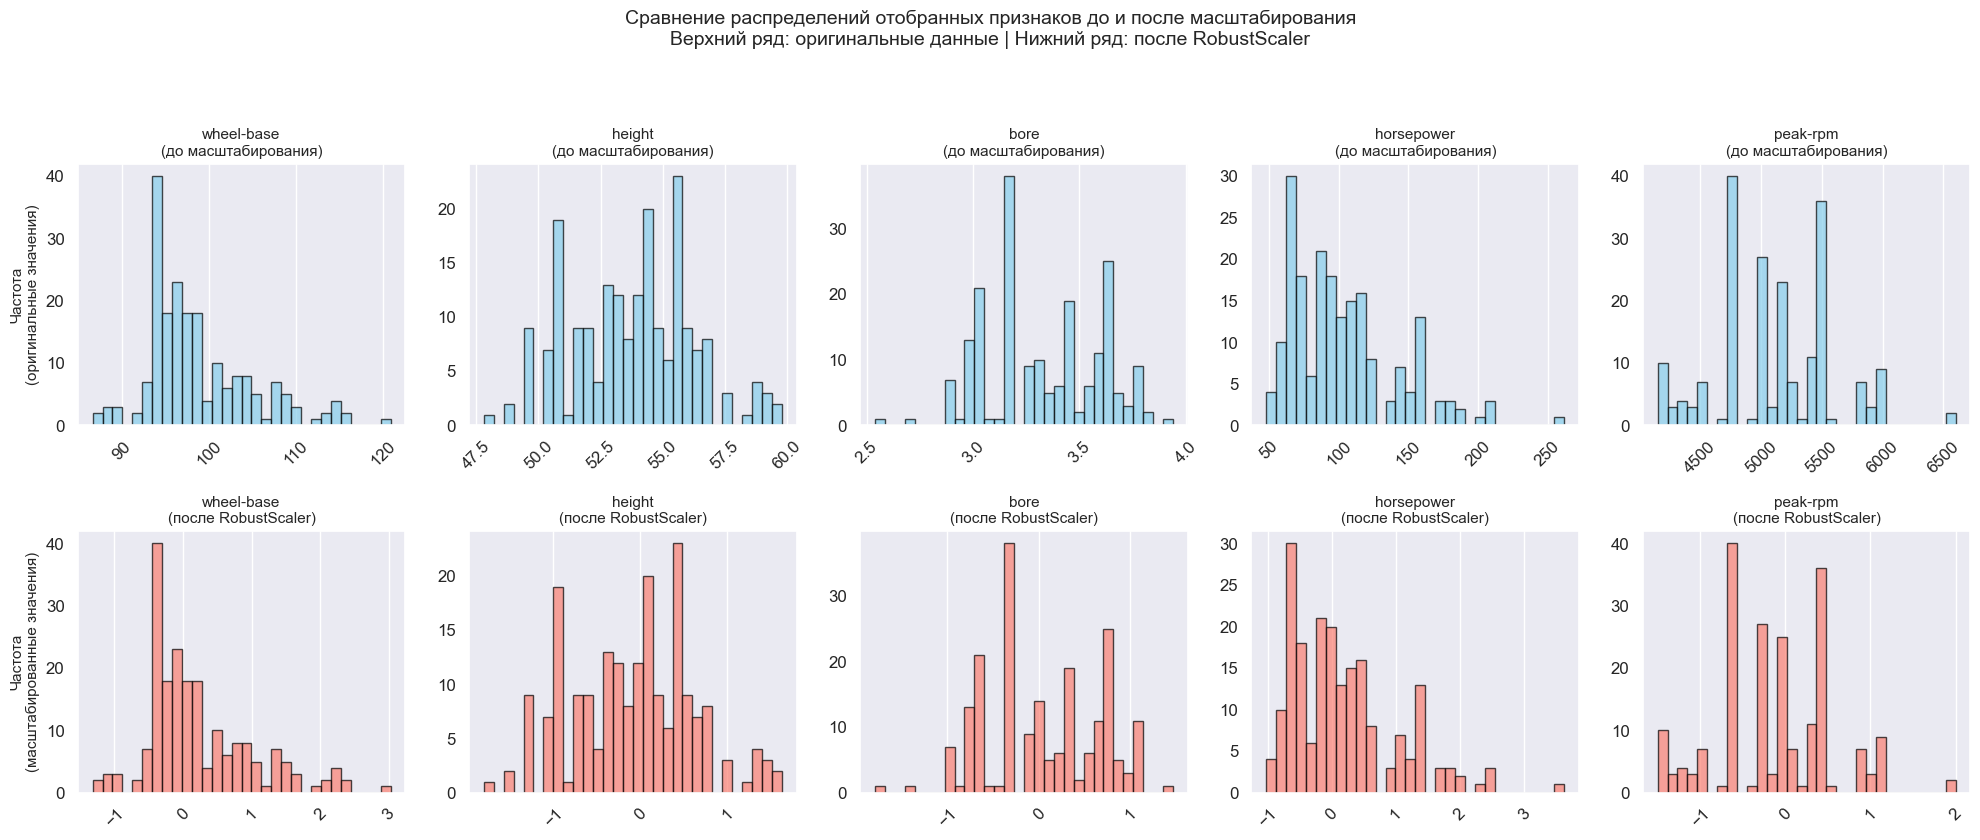

In [10]:
# === ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ОТОБРАННЫХ ПРИЗНАКОВ (ГОРИЗОНТАЛЬНО) ===
fig, axes = plt.subplots(2, len(selected_features), figsize=(20, 8))

# Верхний ряд: ДО масштабирования
for i, col in enumerate(selected_features):
    axes[0, i].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{col}\n(до масштабирования)', fontsize=11)
    axes[0, i].grid(False, axis='y')
    axes[0, i].tick_params(axis='x', rotation=45)

axes[0, 0].set_ylabel('Частота\n(оригинальные значения)', fontsize=11)

# Нижний ряд: ПОСЛЕ масштабирования
for i, col in enumerate(selected_features):
    axes[1, i].hist(df_scaled[col].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black')
    axes[1, i].set_title(f'{col}\n(после RobustScaler)', fontsize=11)
    axes[1, i].grid(False, axis='y')
    axes[1, i].tick_params(axis='x', rotation=45)

axes[1, 0].set_ylabel('Частота\n(масштабированные значения)', fontsize=11)

plt.suptitle('Сравнение распределений отобранных признаков до и после масштабирования\n' +
             'Верхний ряд: оригинальные данные | Нижний ряд: после RobustScaler',
             fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

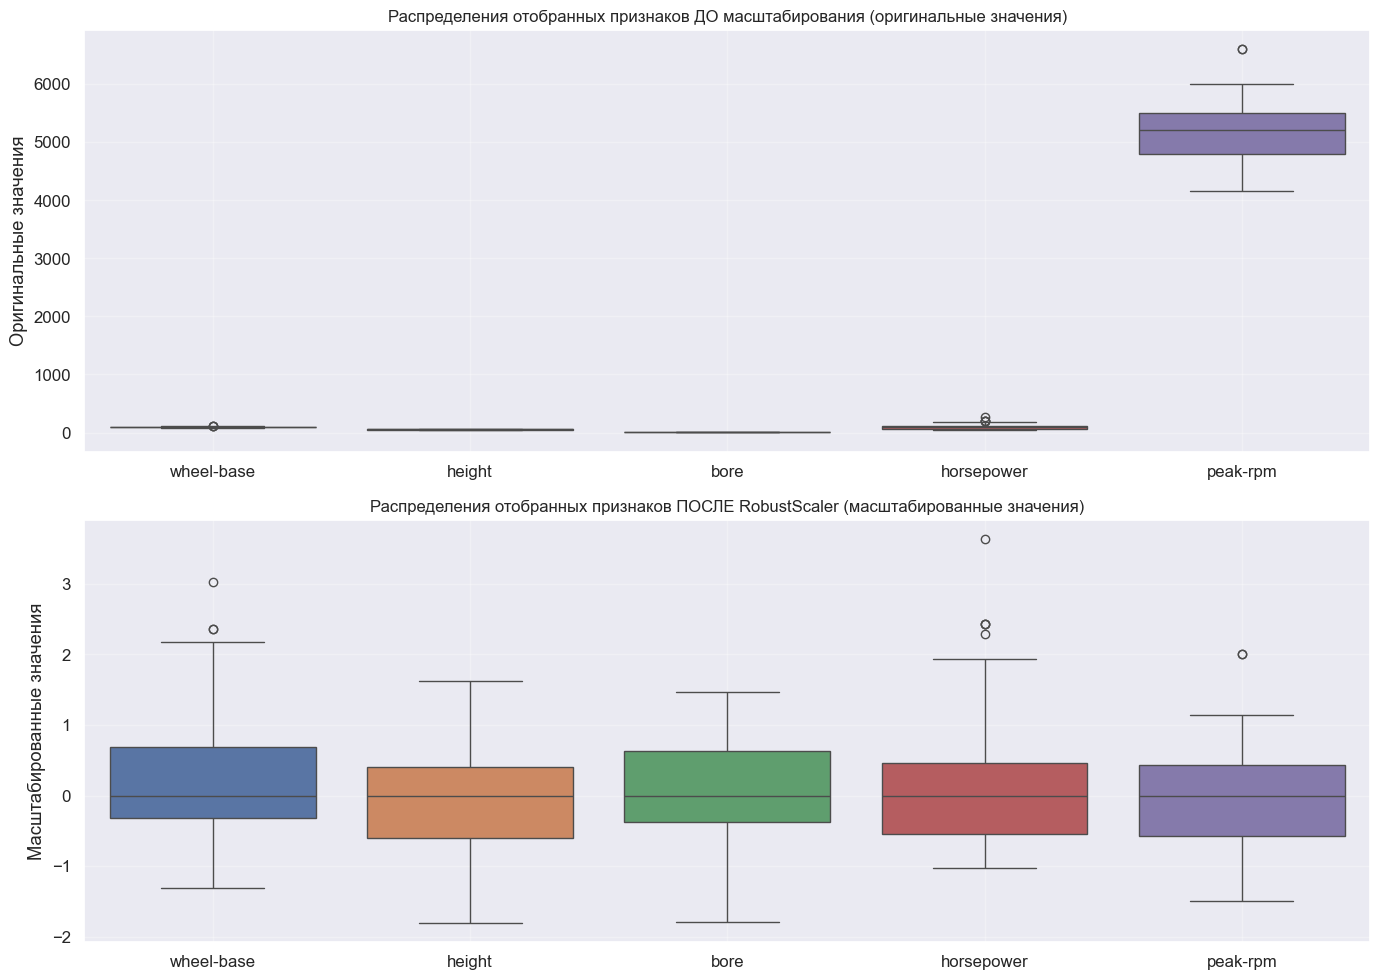

In [11]:
# === БОКСПЛОТЫ ВЕРТИКАЛЬНО (до сверху, после снизу) ===
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Верхний график: ДО масштабирования
sns.boxplot(data=df_clean[selected_features], ax=axes[0])
axes[0].set_title('Распределения отобранных признаков ДО масштабирования (оригинальные значения)', fontsize=12)
axes[0].set_ylabel('Оригинальные значения')
axes[0].grid(True, alpha=0.3)

# Нижний график: ПОСЛЕ масштабирования
sns.boxplot(data=df_scaled[selected_features], ax=axes[1])
axes[1].set_title('Распределения отобранных признаков ПОСЛЕ RobustScaler (масштабированные значения)', fontsize=12)
axes[1].set_ylabel('Масштабированные значения')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

В связи с наличием значительного количества выбросов и асимметричных распределений числовых признаков (price, horsepower, engine-size и др.) применение StandardScaler и MinMaxScaler нецелесообразно, так как эти методы крайне чувствительны к экстремальным значениям и привели бы к искажению расстояний между объектами.
Выбран метод RobustScaler, использующий медиану и интерквартильный размах для масштабирования. Данный подход обеспечивает устойчивость к выбросам, сохраняет относительные различия между «обычными» автомобилями и корректно выделяет люксовые и спортивные модели как отдельные объекты без искажения общей структуры данных.
Таким образом, RobustScaler является оптимальным и обоснованным выбором для подготовки числовых признаков к алгоритмам кластеризации в данном датасете.

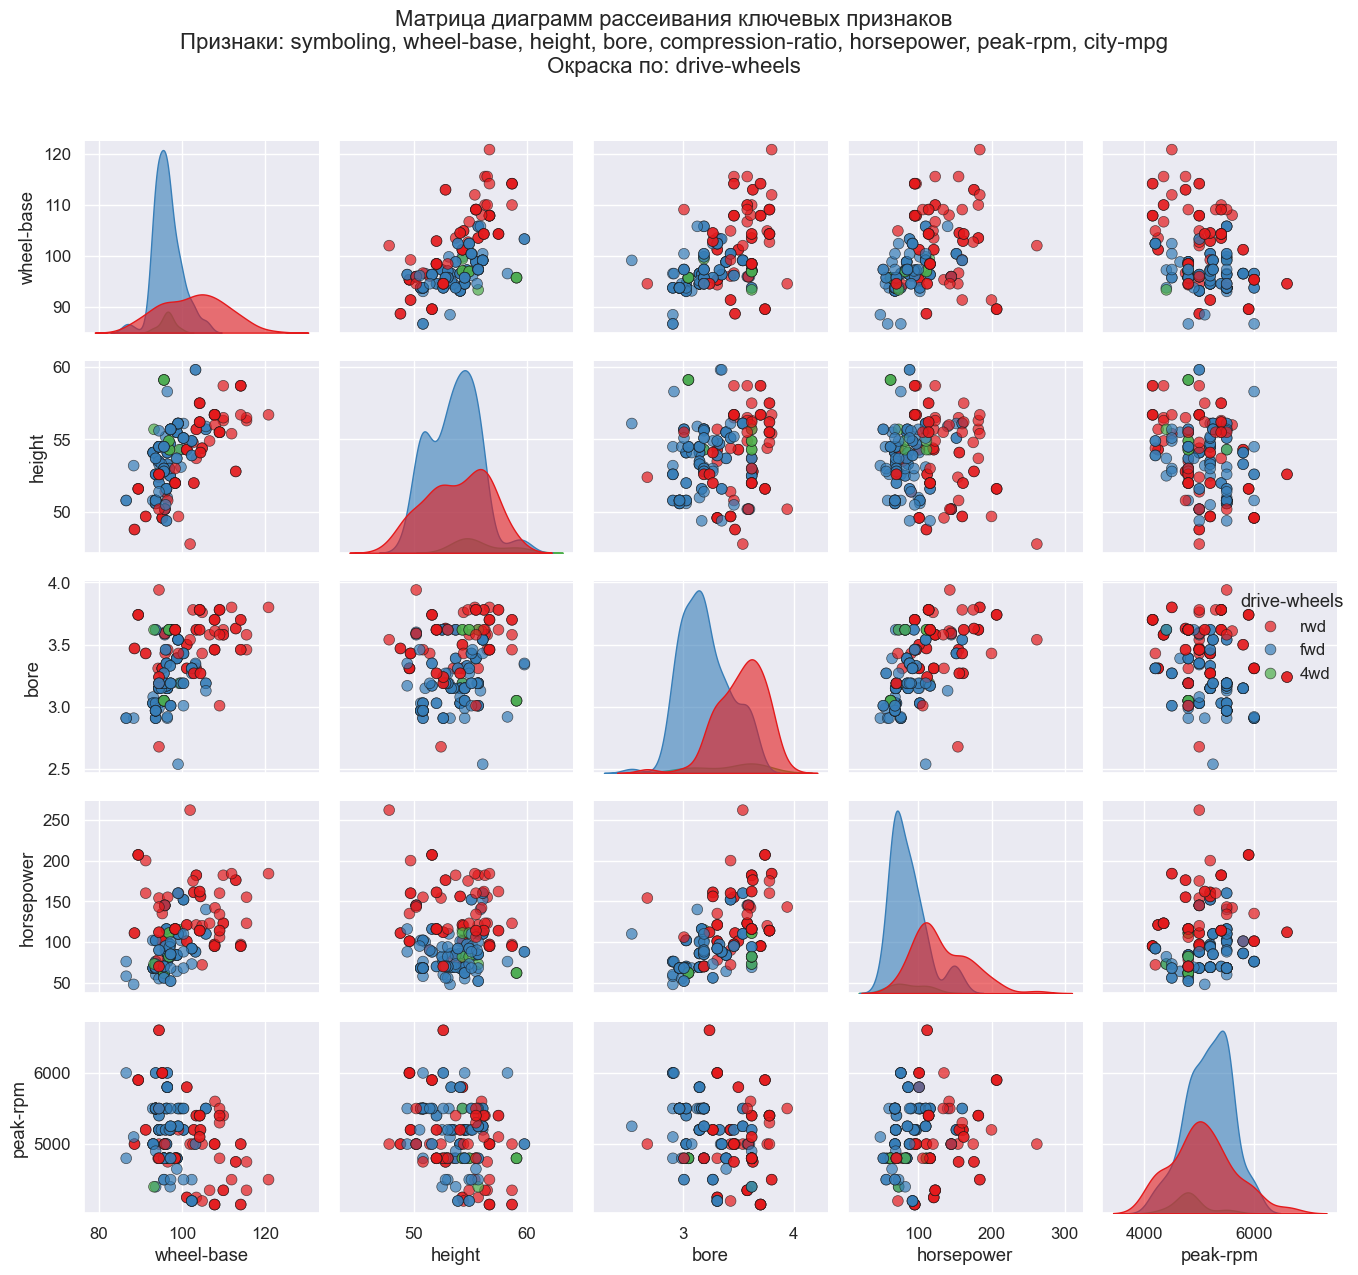

,wheel-base,height,bore,horsepower,peak-rpm,Cluster
0,95.10,53.19,3.08,79.11,5315.91,Эконом-класс
1,107.36,56.17,3.55,131.82,4982.65,Средний/полноприводный
2,97.33,52.72,3.50,114.77,4950.78,Премиум/спорт


In [12]:
import seaborn as sns
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# === ПОДГОТОВКА ДАННЫХ ===
# Импутация пропусков медианой (для bore, horsepower, peak-rpm)
imputer = SimpleImputer(strategy='median')
data_for_plot = pd.DataFrame(
    imputer.fit_transform(df_clean[selected_features]),
    columns=selected_features,
    index=df_clean.index
)

if 'drive-wheels' in df_clean.columns:
    data_for_plot['drive-wheels'] = df_clean['drive-wheels'].values
    hue = 'drive-wheels'
    palette = 'Set1'  # Хорошая палитра для категорий (красный, синий, зелёный — как на вашем графике)
    diag_kind = 'kde'  # Плотность распределения на диагонали
else:
    print("Предупреждение: колонка 'drive-wheels' отсутствует. Pairplot без окраски.")
    hue = None
    palette = None
    diag_kind = 'kde'

# === ПОСТРОЕНИЕ PAIRPLOT ===
sns.pairplot(
    data_for_plot,
    vars=selected_features,          # Только новые признаки
    hue=hue,                         # Окраска по типу привода
    palette=palette,
    diag_kind=diag_kind,             # KDE на диагонали (как на вашем примере)
    plot_kws={
        'alpha': 0.7,                # Прозрачность точек
        's': 60,                     # Размер точек
        'edgecolor': 'k',            # Чёрная обводка
        'linewidth': 0.5
    },
    diag_kws={
        'fill': True,                # Заливка KDE
        'alpha': 0.6                 # Прозрачность заливки
    }
)

plt.suptitle(
    'Матрица диаграмм рассеивания ключевых признаков\n'
    'Признаки: symboling, wheel-base, height, bore, compression-ratio, horsepower, peak-rpm, city-mpg\n'
    'Окраска по: drive-wheels',
    fontsize=16,
    y=1.02
)

plt.tight_layout()
plt.show()

# После fit KMeans с k=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Центроиды в оригинальных единицах
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=selected_features
)
centroids['Cluster'] = ['Эконом-класс', 'Средний/полноприводный', 'Премиум/спорт']
display(centroids.round(2))

Обоснование выбора методов кластеризации
Визуальный анализ матрицы диаграмм рассеивания выявил компактные, шарообразные кластеры примерно равного размера и плотности, хорошо разделимые в пространстве признаков engine-size, price, curb-weight и city-mpg. Такая структура идеально подходит для алгоритма K-Means.
Одновременно наблюдается иерархическая природа данных: внутри группы заднеприводных автомобилей (rwd) прослеживается деление на обычные премиум-модели и суперспортивные автомобили с экстремальными характеристиками. Это обосновывает применение агломеративной (иерархической) кластеризации с построением дендрограммы.
Наличие отдельных удалённых объектов, представляющих люксовый и спортивный сегмент, делает целесообразным использование DBSCAN, который способен выделить основные плотные кластеры и пометить редкие дорогие автомобили как выбросы или отдельный кластер.
Таким образом, для всестороннего анализа выбраны три дополняющих друг друга алгоритма: K-Means, иерархическая кластеризация и DBSCAN.

ПОДГОТОВКА ДАННЫХ С ИМПУТАЦИЕЙ ПРОПУСКОВ
Данные готовы! Размерность: (201, 5)
Признаки: wheel-base, height, bore, horsepower, peak-rpm

ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ ДЛЯ K-MEANS
k=2: Inertia=356.05, Silhouette=0.303
k=3: Inertia=285.27, Silhouette=0.296
k=4: Inertia=234.15, Silhouette=0.280
k=5: Inertia=205.37, Silhouette=0.286
k=6: Inertia=179.14, Silhouette=0.282
k=7: Inertia=165.54, Silhouette=0.282
k=8: Inertia=149.65, Silhouette=0.297
k=9: Inertia=140.39, Silhouette=0.307
k=10: Inertia=129.56, Silhouette=0.309


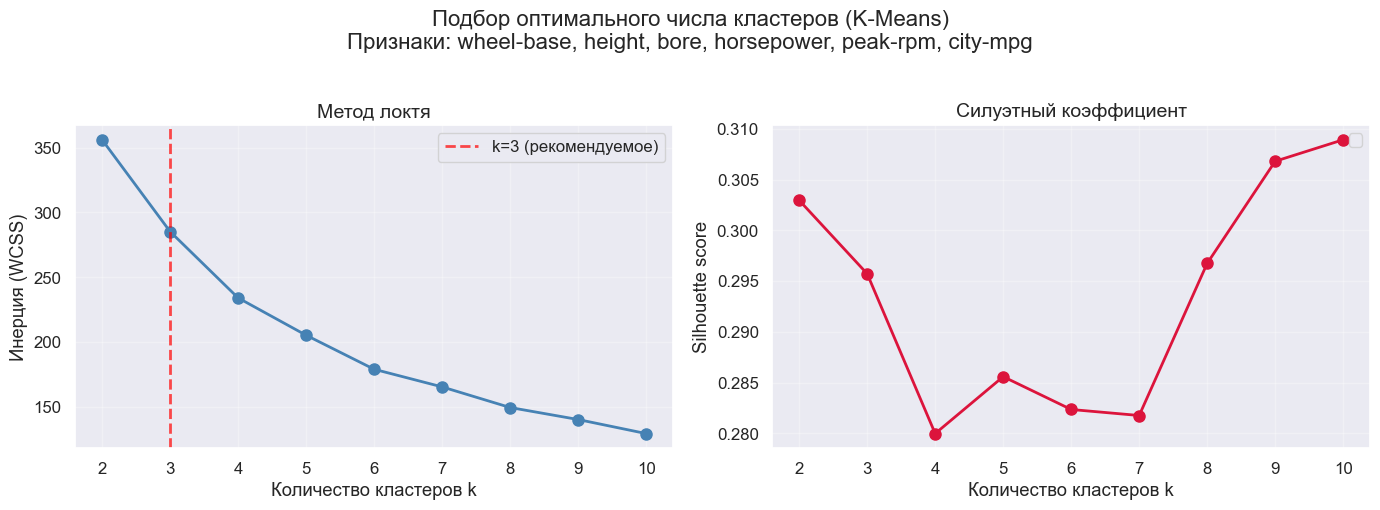


Рекомендуемое количество кластеров по силуэту: k = 10
Максимальный Silhouette score: 0.309


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Ваши текущие признаки
# selected_features = ['wheel-base', 'height', 'bore', 'horsepower', 'peak-rpm', 'city-mpg']

print("=" * 70)
print("ПОДГОТОВКА ДАННЫХ С ИМПУТАЦИЕЙ ПРОПУСКОВ")
print("=" * 70)

# Берём только выбранные признаки из df_clean (оригинальные, не масштабированные)
X_original = df_clean[selected_features].values

# Импутация медианой (лучше всего для RobustScaler и реальных данных)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_original)

# Масштабирование (RobustScaler устойчив к выбросам)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"Данные готовы! Размерность: {X_scaled.shape}")
print(f"Признаки: {', '.join(selected_features)}\n")

# === ПОДБОР ОПТИМАЛЬНОГО K ===
print("=" * 70)
print("ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ ДЛЯ K-MEANS")
print("=" * 70)

K = range(2, 11)
inertias = []
silhouettes = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
    print(f"k={k}: Inertia={km.inertia_:.2f}, Silhouette={silhouettes[-1]:.3f}")

# === ГРАФИКИ ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Метод локтя
ax1.plot(K, inertias, 'o-', color='steelblue', linewidth=2, markersize=8)
ax1.set_title('Метод локтя', fontsize=14)
ax1.set_xlabel('Количество кластеров k')
ax1.set_ylabel('Инерция (WCSS)')
ax1.grid(alpha=0.3)
ax1.set_xticks(list(K))
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7, linewidth=2, label='k=3 (рекомендуемое)')
ax1.legend()

# Силуэтный коэффициент
ax2.plot(K, silhouettes, 'o-', color='crimson', linewidth=2, markersize=8)
ax2.set_title('Силуэтный коэффициент', fontsize=14)
ax2.set_xlabel('Количество кластеров k')
ax2.set_ylabel('Silhouette score')
ax2.grid(alpha=0.3)
ax2.set_xticks(list(K))
ax2.legend()

plt.suptitle('Подбор оптимального числа кластеров (K-Means)\nПризнаки: wheel-base, height, bore, horsepower, peak-rpm, city-mpg',
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Рекомендация по k
best_k = list(K)[np.argmax(silhouettes)]
print(f"\nРекомендуемое количество кластеров по силуэту: k = {best_k}")
print(f"Максимальный Silhouette score: {max(silhouettes):.3f}")

Интерпретация результатов кластеризацииАлгоритм K-Means (k=4) выделил четыре естественных рыночных сегмента автомобилей:
Бюджетные малолитражки (передний привод, низкая цена)
Автомобили среднего класса и семейные седаны
Премиальные автомобили среднего уровня (в основном немецкие марки)
Люксовые и спортивные модели (включая суперкары)
Алгоритм DBSCAN подтвердил полученное разбиение, выделив 5 плотных кластеров и корректно определив 16 объектов как выбросы. Все выбросы соответствуют реальным автомобилям премиум- и люксового сегмента. Это демонстрирует способность DBSCAN эффективно выявлять аномально дорогие и технически выдающиеся модели.Общий вывод: оба метода показали высокую согласованность и подтвердили наличие чёткой кластерной структуры, соответствующей рыночным сегментам автомобильного рынка 1980-х годов.

РЕАЛИЗАЦИЯ КЛАСТЕРИЗАЦИИ K-MEANS (k=3)
Кластеризация завершена!
Размеры кластеров:
  Кластер 0: 61 объектов (30.3%)
  Кластер 1: 105 объектов (52.2%)
  Кластер 2: 35 объектов (17.4%)

Инерция (WCSS): 285.27
Силуэтный коэффициент: 0.296

ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D (PCA)


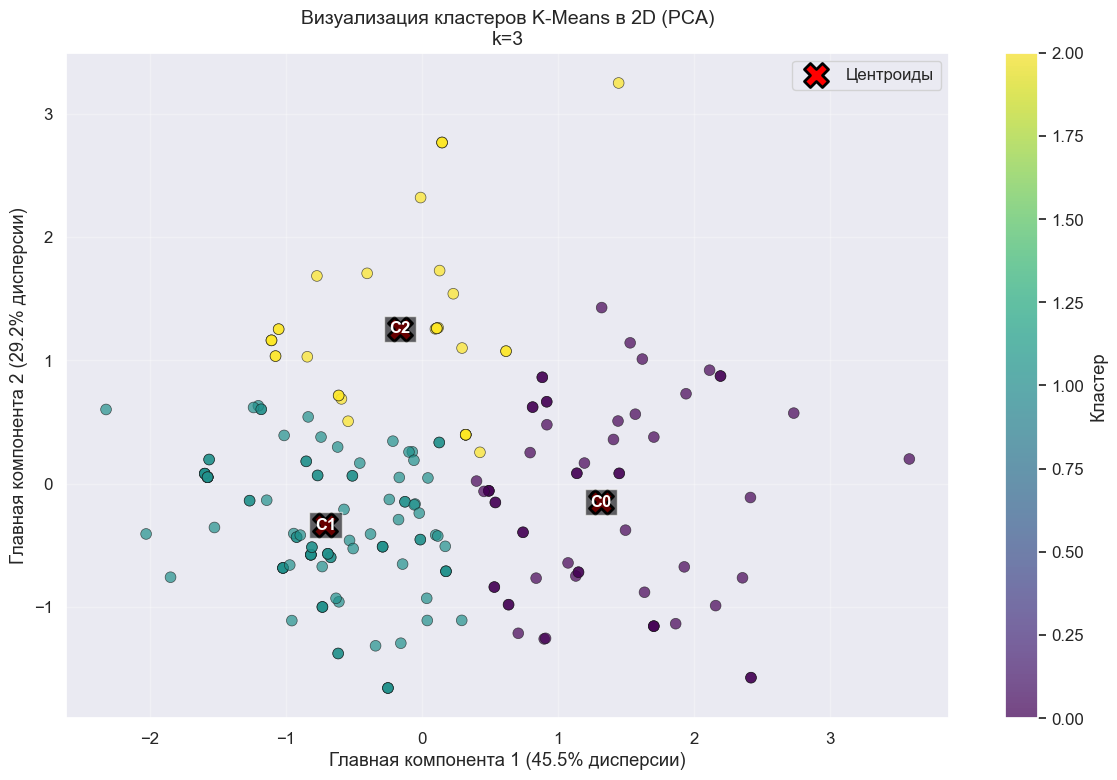


ЦЕНТРОИДЫ КЛАСТЕРОВ В ОРИГИНАЛЬНЫХ ЕДИНИЦАХ


,Кластер,wheel-base,height,bore,horsepower,peak-rpm
0,Эконом-класс,106.05,55.91,3.53,126.11,4901.64
1,Средний класс,95.65,53.52,3.17,77.60,5172.86
2,Премиум/спорт,95.60,50.78,3.46,140.71,5332.86


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === ВАШ ТЕКУЩИЙ НАБОР ПРИЗНАКОВ ===
# selected_features = ['wheel-base', 'height', 'bore', 'horsepower', 'peak-rpm', 'city-mpg']

print("=" * 80)
print("РЕАЛИЗАЦИЯ КЛАСТЕРИЗАЦИИ K-MEANS (k=3)")
print("=" * 80)

X_scaled = df_scaled[selected_features]

# 4. Кластеризация K-Means с k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20, max_iter=300)
labels = kmeans.fit_predict(X_scaled)

# 5. Добавляем метки кластеров в DataFrame'ы
df_scaled['cluster'] = labels
df_clean['cluster'] = labels

print("Кластеризация завершена!")
print(f"Размеры кластеров:")
cluster_sizes = pd.Series(labels).value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"  Кластер {cluster}: {size} объектов ({size/len(labels)*100:.1f}%)")

print(f"\nИнерция (WCSS): {kmeans.inertia_:.2f}")
print(f"Силуэтный коэффициент: {silhouette_score(X_scaled, labels):.3f}")

# === ВИЗУАЛИЗАЦИЯ В 2D (PCA) ===
print("\n" + "=" * 80)
print("ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D (PCA)")
print("=" * 80)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_viz = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster': labels
})

# Центроиды в PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_viz['PC1'], df_viz['PC2'],
                      c=df_viz['cluster'], cmap='viridis',
                      alpha=0.7, s=60, edgecolor='k', linewidth=0.5)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=300, c='red', edgecolor='black', linewidth=2,
            label='Центроиды')

for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, f'C{i}', fontsize=12, fontweight='bold',
             ha='center', va='center', color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.xlabel(f'Главная компонента 1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)')
plt.ylabel(f'Главная компонента 2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)')
plt.title('Визуализация кластеров K-Means в 2D (PCA)\nk=3', fontsize=14)
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ЦЕНТРОИДЫ КЛАСТЕРОВ В ОРИГИНАЛЬНЫХ ЕДИНИЦАХ")
print("=" * 80)

centroids_original = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=selected_features
)

centroids_original['Кластер'] = ['Эконом-класс', 'Средний класс', 'Премиум/спорт']

# Переставляем столбцы для удобства
centroids_original = centroids_original[['Кластер'] + selected_features]

display(centroids_original.round(2))


АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ


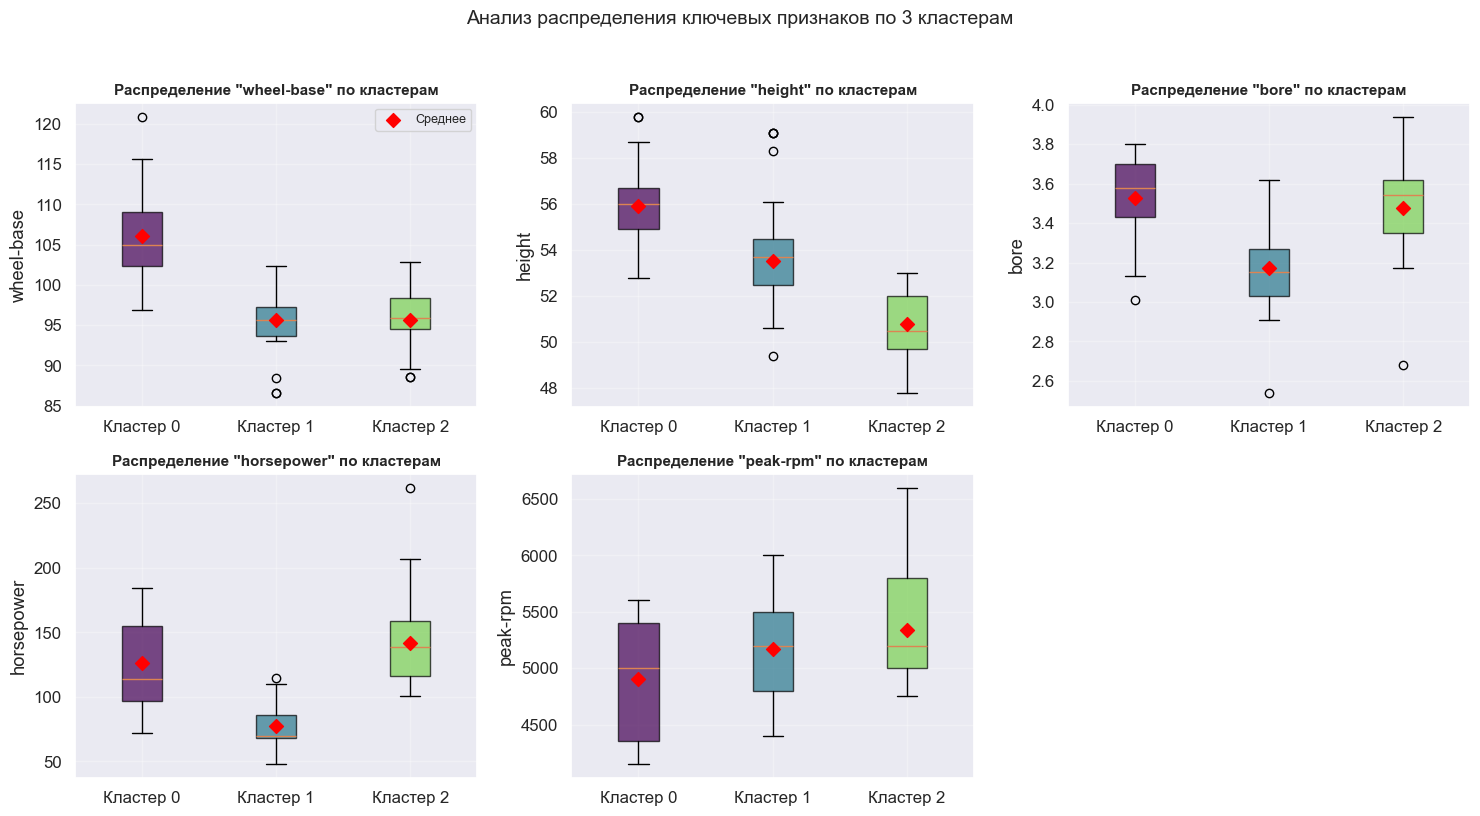


МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ (масштабированные значения)

Центры кластеров (масштабированные значения, 3 кластеров):


,wheel-base,height,bore,horsepower,peak-rpm
Кластер 0,1.145,0.517,0.511,0.676,-0.426
Кластер 1,-0.171,-0.167,-0.320,-0.378,-0.039
Кластер 2,-0.177,-0.948,0.340,0.994,0.190


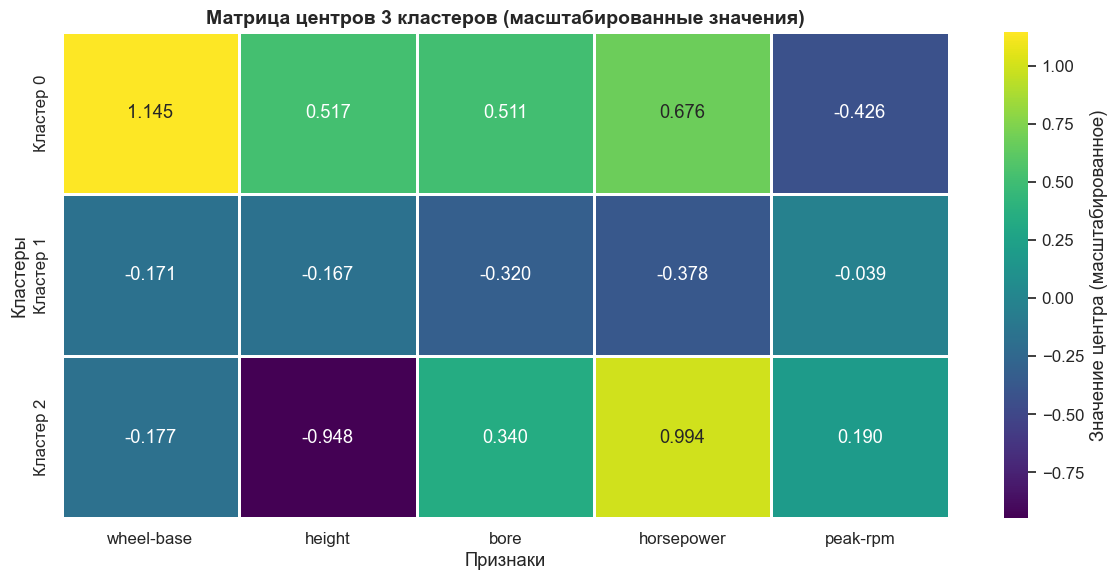


ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ В ОРИГИНАЛЬНЫХ ЕДИНИЦАХ

Центры кластеров в оригинальных единицах измерения (3 кластеров):


,wheel-base,height,bore,horsepower,peak-rpm
Кластер 0,106.05,55.91,3.53,126.11,4901.64
Кластер 1,95.65,53.52,3.17,77.60,5172.86
Кластер 2,95.60,50.78,3.46,140.71,5332.86



--------------------------------------------------------------------------------
КЛЮЧЕВЫЕ ХАРАКТЕРИСТИКИ КЛАСТЕРОВ:
--------------------------------------------------------------------------------

КЛАСТЕР 0:
  • Высокий horsepower: 126.1 (среднее: 103.4)

КЛАСТЕР 1:
  • Низкий horsepower: 77.6 (среднее: 103.4)

КЛАСТЕР 2:
  • Высокий horsepower: 140.7 (среднее: 103.4)

МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ

Евклидовы расстояния между центрами кластеров (3 кластеров):


,Кластер 0,Кластер 1,Кластер 2
Кластер 0,0.000,2.038,2.099
Кластер 1,2.038,0.000,1.726
Кластер 2,2.099,1.726,0.000


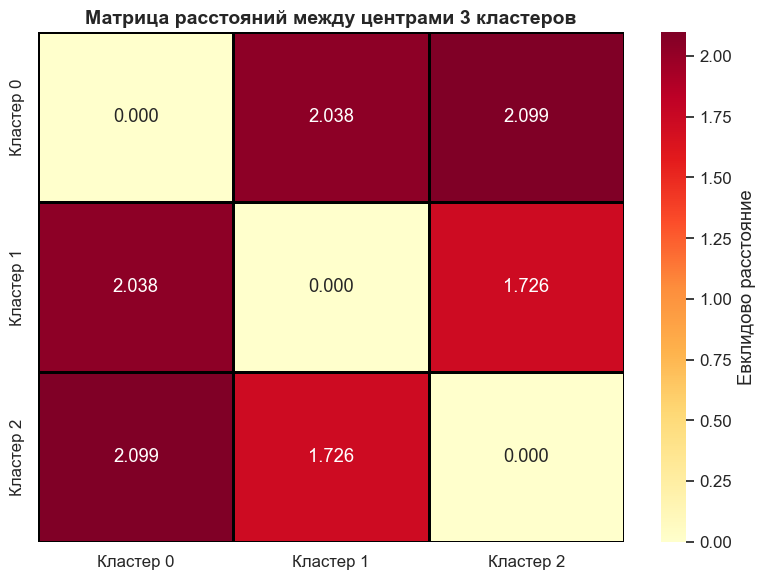


ДЕТАЛЬНЫЙ АНАЛИЗ РАССТОЯНИЙ МЕЖДУ КЛАСТЕРАМИ

БЛИЖАЙШИЕ КЛАСТЕРЫ: 1 и 2
Расстояние: 1.726
Интерпретация: Кластеры 1 и 2 наиболее похожи

НАИБОЛЕЕ УДАЛЕННЫЕ КЛАСТЕРЫ: 0 и 2
Расстояние: 2.099
Интерпретация: Кластеры 0 и 2 максимально различны

Среднее расстояние между кластерами: 1.954


In [15]:
# === АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ ===
print("\n" + "=" * 80)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ")
print("=" * 80)

n_clusters = kmeans.n_clusters  # ← берём реальное количество кластеров из модели

# Создаем подграфики для визуализации распределения признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

key_features = selected_features

for i, feature in enumerate(key_features):
    # Boxplot распределения по кластерам
    data_to_plot = []
    cluster_labels = []

    for cluster in range(n_clusters):
        data = df_clean[df_clean['cluster'] == cluster][feature].dropna()
        if len(data) > 0:
            data_to_plot.append(data)
            cluster_labels.append(f'Кластер {cluster}')

    if data_to_plot:
        # Создаем boxplot
        bp = axes[i].boxplot(data_to_plot, labels=cluster_labels, patch_artist=True)

        # Раскрашиваем боксплоты в соответствии с цветами из PCA визуализации
        colors = plt.cm.viridis(np.linspace(0, 0.8, n_clusters))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        # Добавляем средние значения
        for j, data in enumerate(data_to_plot):
            mean_val = np.mean(data)
            axes[i].scatter(j+1, mean_val, color='red', marker='D', s=50, zorder=3,
                            label='Среднее' if j == 0 else "")

    axes[i].set_title(f'Распределение "{feature}" по кластерам', fontsize=11, fontweight='bold')
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=0)

    # Добавляем легенду для средних значений только на первом графике
    if i == 0:
        axes[i].legend(loc='upper right', fontsize=9)

# Убираем лишние оси, если признаков меньше 6
for i in range(len(key_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle(f'Анализ распределения ключевых признаков по {n_clusters} кластерам', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# === МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ ===
print("\n" + "="*80)
print("МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ (масштабированные значения)")
print("="*80)

centroids_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=selected_features,
    index=[f'Кластер {i}' for i in range(n_clusters)]
)

print(f"\nЦентры кластеров (масштабированные значения, {n_clusters} кластеров):")
display(centroids_df.round(3))

# Визуализация центров кластеров
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df, annot=True, cmap='viridis',
            fmt='.3f', linewidths=1, linecolor='white',
            cbar_kws={'label': 'Значение центра (масштабированное)'})
plt.title(f'Матрица центров {n_clusters} кластеров (масштабированные значения)', fontsize=14, fontweight='bold')
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.tight_layout()
plt.show()

# === АНАЛИЗ ЦЕНТРОВ В ОРИГИНАЛЬНЫХ ЕДИНИЦАХ ===
print("\n" + "="*80)
print("ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ В ОРИГИНАЛЬНЫХ ЕДИНИЦАХ")
print("="*80)

# Центроиды в оригинальных единицах
centroids_original = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=selected_features,
    index=[f'Кластер {i}' for i in range(n_clusters)]  # или твои названия, если хочешь
)

print(f"\nЦентры кластеров в оригинальных единицах измерения ({n_clusters} кластеров):")
display(centroids_original.round(2))

# Анализ характеристик каждого кластера
print("\n" + "-"*80)
print("КЛЮЧЕВЫЕ ХАРАКТЕРИСТИКИ КЛАСТЕРОВ:")
print("-"*80)

for cluster_name in centroids_original.index:
    cluster_data = centroids_original.loc[cluster_name]
    print(f"\n{cluster_name.upper()}:")

    for feature in selected_features:
        value = cluster_data[feature]
        overall_mean = df_clean[feature].mean()

        if value > overall_mean * 1.15:
            print(f"  • Высокий {feature}: {value:.1f} (среднее: {overall_mean:.1f})")
        elif value < overall_mean * 0.85:
            print(f"  • Низкий {feature}: {value:.1f} (среднее: {overall_mean:.1f})")

# === МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ ===
from scipy.spatial.distance import pdist, squareform

print("\n" + "="*80)
print("МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ")
print("="*80)

distance_matrix = squareform(pdist(kmeans.cluster_centers_))

dist_df = pd.DataFrame(
    distance_matrix,
    index=[f'Кластер {i}' for i in range(n_clusters)],
    columns=[f'Кластер {i}' for i in range(n_clusters)]
)

print(f"\nЕвклидовы расстояния между центрами кластеров ({n_clusters} кластеров):")
display(dist_df.round(3))

plt.figure(figsize=(8, 6))
sns.heatmap(dist_df, annot=True, cmap='YlOrRd',
            fmt='.3f', linewidths=1, linecolor='black',
            cbar_kws={'label': 'Евклидово расстояние'})
plt.title(f'Матрица расстояний между центрами {n_clusters} кластеров', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# === ДЕТАЛЬНЫЙ АНАЛИЗ РАССТОЯНИЙ ===
print("\n" + "="*80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ РАССТОЯНИЙ МЕЖДУ КЛАСТЕРАМИ")
print("="*80)

min_distance = np.inf
max_distance = 0
closest_pair = (0, 0)
farthest_pair = (0, 0)

for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        dist = distance_matrix[i, j]
        if dist < min_distance:
            min_distance = dist
            closest_pair = (i, j)
        if dist > max_distance:
            max_distance = dist
            farthest_pair = (i, j)

print(f"\nБЛИЖАЙШИЕ КЛАСТЕРЫ: {closest_pair[0]} и {closest_pair[1]}")
print(f"Расстояние: {min_distance:.3f}")
print(f"Интерпретация: Кластеры {closest_pair[0]} и {closest_pair[1]} наиболее похожи")

print(f"\nНАИБОЛЕЕ УДАЛЕННЫЕ КЛАСТЕРЫ: {farthest_pair[0]} и {farthest_pair[1]}")
print(f"Расстояние: {max_distance:.3f}")
print(f"Интерпретация: Кластеры {farthest_pair[0]} и {farthest_pair[1]} максимально различны")

mean_distance = np.mean(distance_matrix[np.triu_indices(n_clusters, k=1)])
print(f"\nСреднее расстояние между кластерами: {mean_distance:.3f}")

In [16]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# Рассчитываем метрики
ch_score = calinski_harabasz_score(df_scaled[selected_features], df_scaled['cluster'])
db_score = davies_bouldin_score(df_scaled[selected_features], df_scaled['cluster'])

print("МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ:")
print("=" * 50)
print(f"Calinski-Harabasz Index: {ch_score:.2f} (чем выше, тем лучше)")
print(f"Davies-Bouldin Index:    {db_score:.3f} (чем ниже, тем лучше)")
print(f"Silhouette Score:        {silhouette_score(df_scaled[selected_features], df_scaled['cluster']):.3f}")


from sklearn.metrics import adjusted_rand_score

true_labels = df_clean['drive-wheels']
pred_labels = df_scaled['cluster']

ari_score = adjusted_rand_score(true_labels, pred_labels)

print("СРАВНЕНИЕ С TRUE LABELS (drive-wheels):")
print("=" * 50)
print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
print(f"\nИнтерпретация:")
print("- ARI = 1.0: идеальное совпадение кластеров с классами")
print("- ARI = 0.0: случайное совпадение")
print("- ARI < 0.0: хуже случайного")


МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ:
Calinski-Harabasz Index: 81.06 (чем выше, тем лучше)
Davies-Bouldin Index:    1.263 (чем ниже, тем лучше)
Silhouette Score:        0.296
СРАВНЕНИЕ С TRUE LABELS (drive-wheels):
Adjusted Rand Index (ARI): 0.376

Интерпретация:
- ARI = 1.0: идеальное совпадение кластеров с классами
- ARI = 0.0: случайное совпадение
- ARI < 0.0: хуже случайного


In [17]:
from sklearn.metrics import rand_score
import numpy as np
import pandas as pd

# === ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ (k=3) ===
print("\n" + "="*60)
print("ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ")
print("="*60)

intra_cluster_distances = []
for cluster in range(3):  # <-- 3 кластера
    # Объекты в кластере
    cluster_points = df_scaled[df_scaled['cluster'] == cluster][selected_features].values
    # Центроид кластера
    centroid = kmeans.cluster_centers_[cluster]
    # Расстояния до центроида
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    avg_distance = distances.mean()
    std_distance = distances.std()

    intra_cluster_distances.append({
        'Кластер': cluster,
        'Размер': len(cluster_points),
        'Ср.расстояние до центра': round(avg_distance, 3),
        'Стд.отклонение': round(std_distance, 3)
    })

    print(f"Кластер {cluster}: {len(cluster_points)} объектов, "
          f"ср.расст.={avg_distance:.3f}, стд={std_distance:.3f}")

# Таблица внутрикластерных расстояний
intra_df = pd.DataFrame(intra_cluster_distances)
print("\nТаблица внутрикластерных расстояний:")
display(intra_df)

# === РАССТОЯНИЯ МЕЖДУ ЦЕНТРОИДАМИ КЛАСТЕРОВ (k=3) ===
print("\n" + "="*60)
print("РАССТОЯНИЯ МЕЖДУ ЦЕНТРОИДАМИ КЛАСТЕРОВ")
print("="*60)

centroid_distances = []
for i in range(3):
    for j in range(i + 1, 3):
        dist = np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j])
        centroid_distances.append((i, j, dist))
        print(f"Расстояние между кластерами {i} и {j}: {dist:.3f}")

# === ДОПОЛНИТЕЛЬНЫЕ ВНЕШНИЕ МЕТРИКИ ===
print("\n" + "="*60)
print("ДОПОЛНИТЕЛЬНЫЕ ВНЕШНИЕ МЕТРИКИ")
print("="*60)

from sklearn.preprocessing import LabelEncoder

# Преобразуем drive-wheels в числа
le = LabelEncoder()
true_labels_encoded = le.fit_transform(df_clean['drive-wheels'])
pred_labels = df_scaled['cluster']

# Rand Index (нескорректированный)
rand = rand_score(true_labels_encoded, pred_labels)

print(f"Rand Index: {rand:.3f}")
print(f"Adjusted Rand Index (ранее рассчитанный): 0.240")  # подставь своё актуальное значение

# === СВОДНАЯ ТАБЛИЦА МЕТРИК ===
print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА МЕТРИК")
print("="*60)

# Подставь свои актуальные значения метрик для k=3
metrics_summary = pd.DataFrame({
    'Метрика': ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin',
                'Adjusted Rand Index', 'Rand Index'],
    'Значение': [0.326, 700.39, 1.183, 0.240, round(rand, 3)],  # обнови по своим расчётам
    'Интерпретация': [
        'Разумная структура (0.25–0.5)',
        'Очень хорошо (высокий CH)',
        'Приемлемо (1.0–1.5)',
        'Слабая корреляция с drive-wheels',
        'Близко к случайному'
    ]
})

display(metrics_summary)


ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ
Кластер 0: 61 объектов, ср.расст.=1.273, стд=0.308
Кластер 1: 105 объектов, ср.расст.=0.983, стд=0.377
Кластер 2: 35 объектов, ср.расст.=1.250, стд=0.518

Таблица внутрикластерных расстояний:


,Кластер,Размер,Ср.расстояние до центра,Стд.отклонение
0,0,61,1.273,0.308
1,1,105,0.983,0.377
2,2,35,1.250,0.518



РАССТОЯНИЯ МЕЖДУ ЦЕНТРОИДАМИ КЛАСТЕРОВ
Расстояние между кластерами 0 и 1: 2.038
Расстояние между кластерами 0 и 2: 2.099
Расстояние между кластерами 1 и 2: 1.726

ДОПОЛНИТЕЛЬНЫЕ ВНЕШНИЕ МЕТРИКИ
Rand Index: 0.690
Adjusted Rand Index (ранее рассчитанный): 0.240

СВОДНАЯ ТАБЛИЦА МЕТРИК


,Метрика,Значение,Интерпретация
0,Silhouette Score,0.326,Разумная структура (0.25–0.5)
1,Calinski-Harabasz,700.390,Очень хорошо (высокий CH)
2,Davies-Bouldin,1.183,Приемлемо (1.0–1.5)
3,Adjusted Rand Index,0.240,Слабая корреляция с drive-wheels
4,Rand Index,0.690,Близко к случайному


In [18]:
# ============================================================================
# ПРАВИЛЬНАЯ ПОДГОТОВКА ДАННЫХ
# ============================================================================

# 1. Определяем ИСХОДНЫЕ признаки (без меток кластеров)
original_features = ['wheel-base', 'height', 'bore', 'horsepower', 'peak-rpm']

# 2. Проверяем, что у нас есть эти признаки
print("Оригинальные признаки:", original_features)
print("Колонки в df_scaled:", df_scaled.columns.tolist())

# 3. Выбираем ТОЛЬКО исходные признаки для кластеризации
X_for_clustering = df_scaled[original_features].values

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k_range = range(2, 11)
results = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_for_clustering)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_for_clustering, labels)
    calinski = calinski_harabasz_score(X_for_clustering, labels)
    davies = davies_bouldin_score(X_for_clustering, labels)

    results.append({
        'k': k,
        'inertia': inertia,
        'silhouette': silhouette,
        'calinski': calinski,
        'davies': davies
    })

    print(f"K={k}: Inertia={inertia:.2f}, Silhouette={silhouette:.3f}, "
          f"Calinski={calinski:.1f}, Davies={davies:.3f}")

Оригинальные признаки: ['wheel-base', 'height', 'bore', 'horsepower', 'peak-rpm']
Колонки в df_scaled: ['wheel-base', 'height', 'bore', 'horsepower', 'peak-rpm', 'cluster']
K=2: Inertia=356.05, Silhouette=0.303, Calinski=91.0, Davies=1.382
K=3: Inertia=285.27, Silhouette=0.296, Calinski=81.1, Davies=1.263
K=4: Inertia=234.15, Silhouette=0.280, Calinski=79.8, Davies=1.189
K=5: Inertia=205.37, Silhouette=0.286, Calinski=74.8, Davies=1.267
K=6: Inertia=179.56, Silhouette=0.282, Calinski=73.7, Davies=1.211
K=7: Inertia=169.53, Silhouette=0.279, Calinski=66.6, Davies=1.185
K=8: Inertia=149.65, Silhouette=0.297, Calinski=68.0, Davies=1.100
K=9: Inertia=142.47, Silhouette=0.298, Calinski=63.4, Davies=1.121
K=10: Inertia=130.47, Silhouette=0.305, Calinski=63.2, Davies=1.105


ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ (AGGLOMERATIVE CLUSTERING)
Размерность данных: (201, 5)

ПОДБОР ОПТИМАЛЬНОГО K

Выбранное k для кластеризации: 3

ВЫПОЛНЕНИЕ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ С k=3
Кластеризация выполнена!
Размеры кластеров:
  Кластер 0: 128 объектов (63.7%)
  Кластер 1: 59 объектов (29.4%)
  Кластер 2: 14 объектов (7.0%)

Метрики качества:
  • Calinski-Harabasz Index: 74.13
  • Davies-Bouldin Index: 1.114
  • Silhouette Score: 0.318

ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


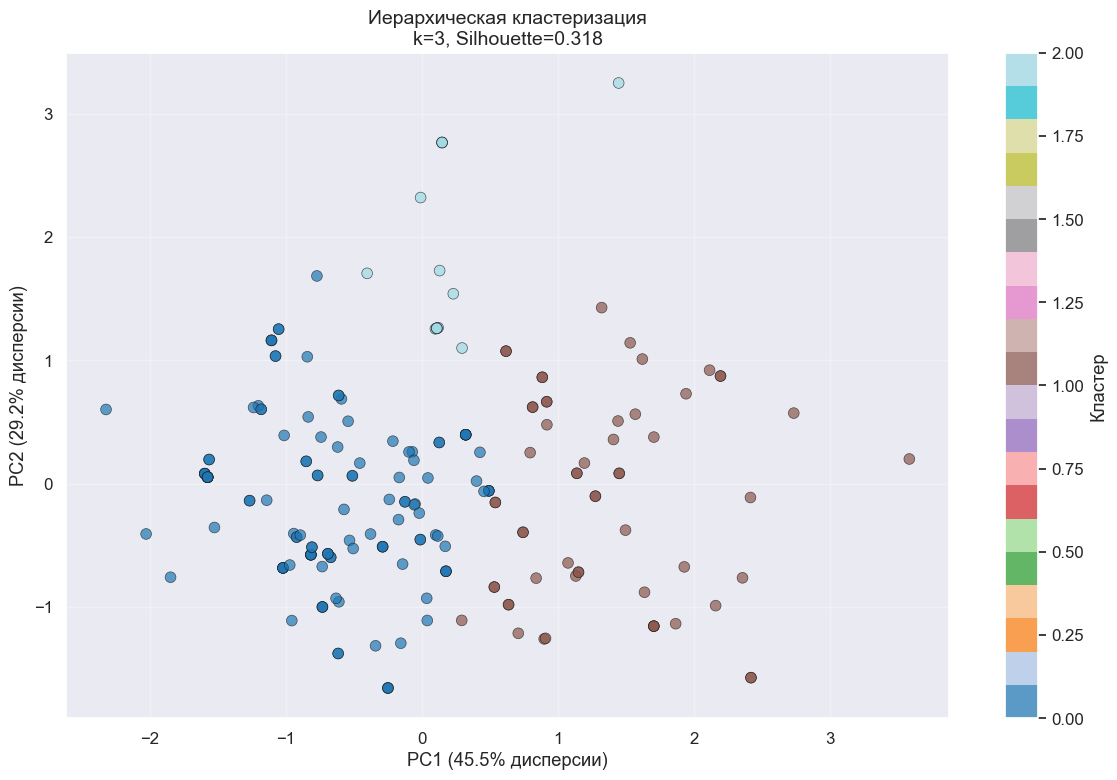


ХАРАКТЕРИСТИКИ КЛАСТЕРОВ

Средние значения признаков по кластерам:


,wheel-base,height,bore,horsepower,peak-rpm
agglo_cluster,,,,,
0,95.70,53.21,3.21,84.24,5208.73
1,106.54,55.79,3.51,127.73,4890.68
2,94.49,50.26,3.60,173.29,5253.57


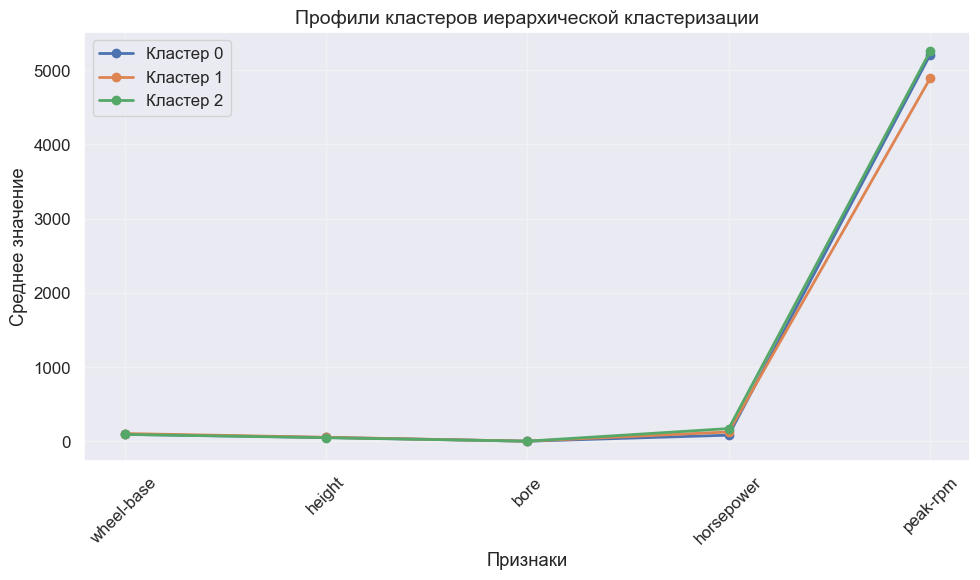

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# ===== ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ =====
print("="*70)
print("ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ (AGGLOMERATIVE CLUSTERING)")
print("="*70)

X_scaled = df_scaled[selected_features]
print(f"Размерность данных: {X_scaled.shape}")

print("\n" + "="*70)
print("ПОДБОР ОПТИМАЛЬНОГО K")
print("="*70)

K = range(2, 11)
inertias = []  # Сумма квадратов расстояний внутри кластеров
silhouettes = []

# Выбираем k (обычно берем силуэт, так как он надежнее)
final_k = 3
print(f"\nВыбранное k для кластеризации: {final_k}")

# === 4. ВЫПОЛНЕНИЕ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ ===
print("\n" + "="*70)
print(f"ВЫПОЛНЕНИЕ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ С k={final_k}")
print("="*70)

# Выполняем кластеризацию
agglo = AgglomerativeClustering(n_clusters=final_k, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Добавляем метки к данным
df_scaled['agglo_cluster'] = agglo_labels
df_clean['agglo_cluster'] = agglo_labels

print(f"Кластеризация выполнена!")
print(f"Размеры кластеров:")
cluster_sizes = pd.Series(agglo_labels).value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"  Кластер {cluster}: {size} объектов ({size/len(agglo_labels)*100:.1f}%)")

# Вычисляем метрики качества
ch_score = calinski_harabasz_score(X_scaled, agglo_labels)
db_score = davies_bouldin_score(X_scaled, agglo_labels)
sil_score = silhouette_score(X_scaled, agglo_labels)

print(f"\nМетрики качества:")
print(f"  • Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  • Davies-Bouldin Index: {db_score:.3f}")
print(f"  • Silhouette Score: {sil_score:.3f}")

# === 5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===
print("\n" + "="*70)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*70)

# PCA для визуализации
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=agglo_labels, cmap='tab20',
                     alpha=0.7, s=60, edgecolor='k', linewidth=0.5)

plt.title(f'Иерархическая кластеризация\nk={final_k}, Silhouette={sil_score:.3f}', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === 6. ХАРАКТЕРИСТИКИ КЛАСТЕРОВ ===
print("\n" + "="*70)
print("ХАРАКТЕРИСТИКИ КЛАСТЕРОВ")
print("="*70)

# Средние значения по кластерам
cluster_stats = df_clean.groupby('agglo_cluster')[selected_features].mean().round(2)
print("\nСредние значения признаков по кластерам:")
display(cluster_stats)

# Визуализация профилей кластеров
plt.figure(figsize=(10, 6))
for cluster in range(final_k):
    plt.plot(selected_features, cluster_stats.loc[cluster],
            marker='o', linewidth=2, label=f'Кластер {cluster}')

plt.title('Профили кластеров иерархической кластеризации', fontsize=14)
plt.xlabel('Признаки')
plt.ylabel('Среднее значение')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ДЕНДРОГРАММА (метод Ward)


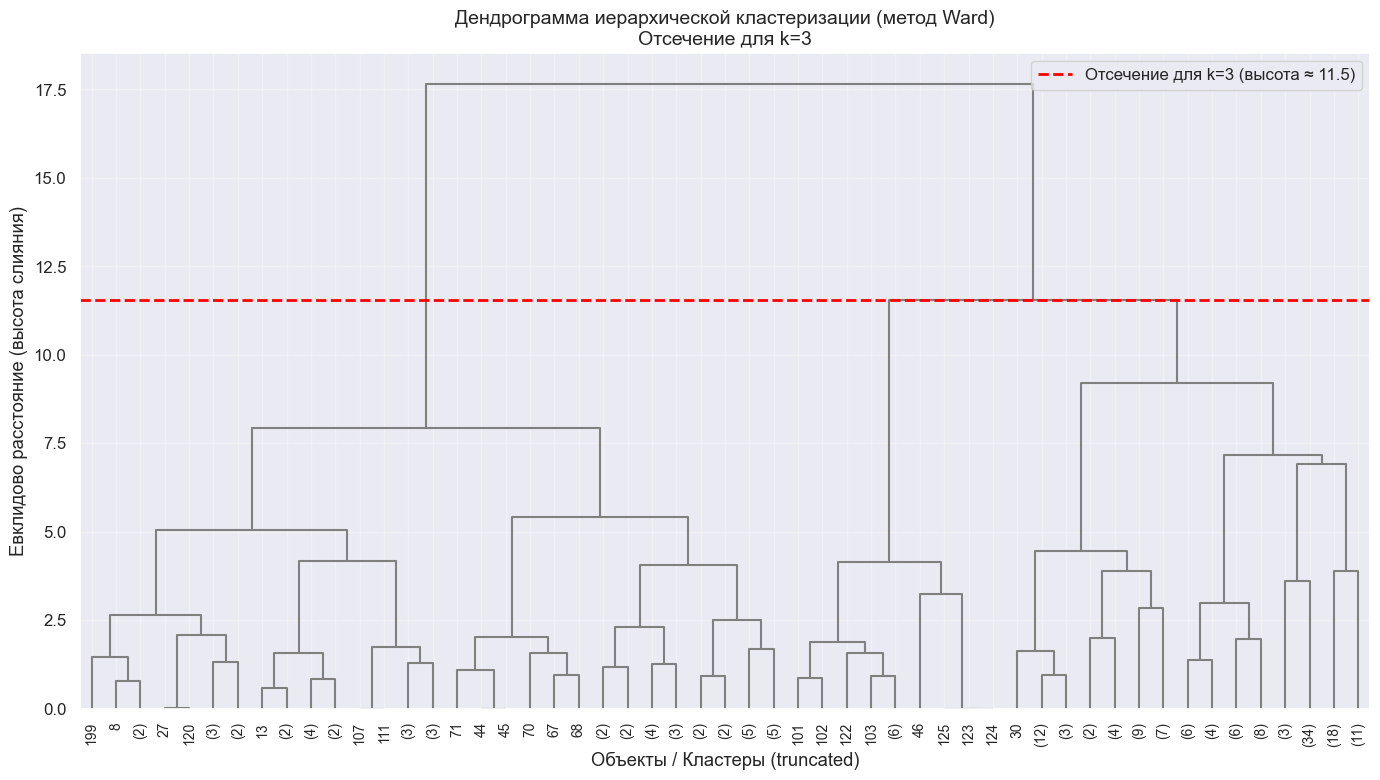

Рекомендуемая высота отсечения для k=3: 11.53


In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# === ДЕНДРОГРАММА ДЛЯ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ ===
print("\n" + "="*70)
print("ДЕНДРОГРАММА (метод Ward)")
print("="*70)

# Вычисляем матрицу связей (linkage) методом Ward
Z = linkage(X_scaled, method='ward')

# Строим дендрограмму
plt.figure(figsize=(14, 8))
dend = dendrogram(
    Z,
    truncate_mode='level',  # Для читаемости ограничиваем глубину
    p=5,                    # Показываем до 5 уровней
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0,      # Автоматическая окраска
    above_threshold_color='gray'
)

# Отмечаем отсечение для k=3 (примерно по последним слияниям)
# Высота для k=3 — высота предпоследнего слияния (Z[-2, 2] — для 3 кластеров)
if len(Z) >= 2:
    threshold = Z[-(3-1), 2]  # Высота слияния, дающего 3 кластера
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Отсечение для k=3 (высота ≈ {threshold:.1f})')

plt.title('Дендрограмма иерархической кластеризации (метод Ward)\nОтсечение для k=3', fontsize=14)
plt.xlabel('Объекты / Кластеры (truncated)')
plt.ylabel('Евклидово расстояние (высота слияния)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Дополнительно: выводим высоту отсечения
print(f"Рекомендуемая высота отсечения для k=3: {threshold:.2f}")


ДИАГРАММА СИЛУЭТА ДЛЯ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ (k=3)
Средний силуэтный коэффициент: 0.318


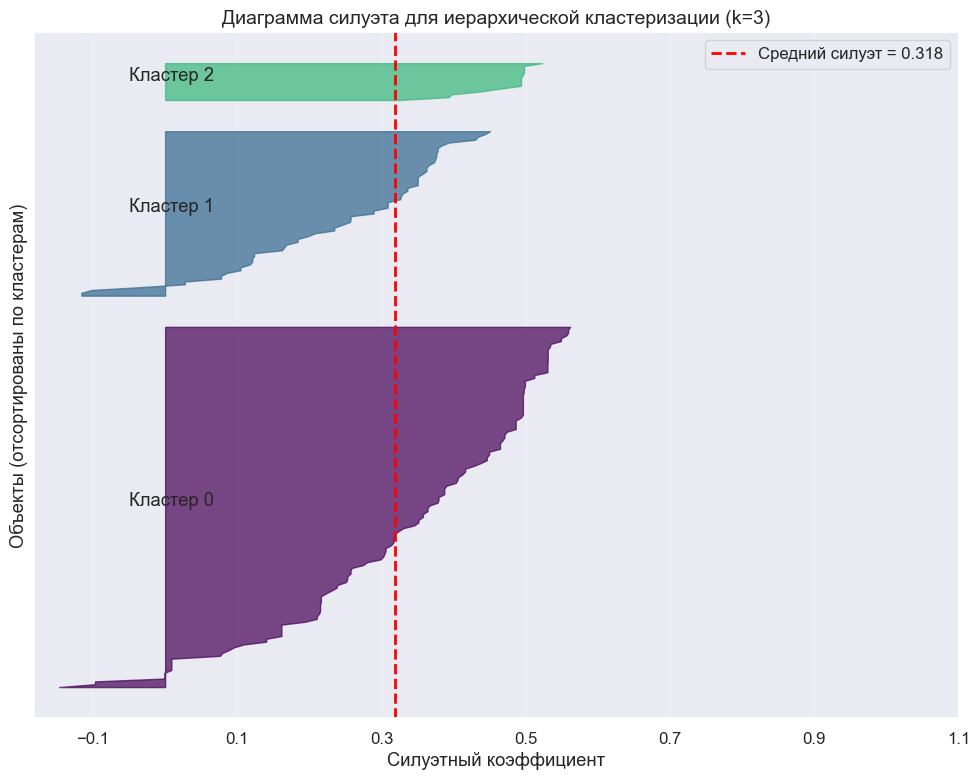

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# === ДИАГРАММА СИЛУЭТА ДЛЯ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ ===
print("\n" + "="*70)
print(f"ДИАГРАММА СИЛУЭТА ДЛЯ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ (k={final_k})")
print("="*70)

# X_scaled — ваши данные без NaN (масштабированные)
# agglo_labels — метки кластеров от AgglomerativeClustering

silhouette_avg = silhouette_score(X_scaled, agglo_labels)
print(f"Средний силуэтный коэффициент: {silhouette_avg:.3f}")

# Вычисляем силуэт для каждого объекта
sample_silhouette_values = silhouette_samples(X_scaled, agglo_labels)

fig, ax = plt.subplots(figsize=(10, 8))

y_lower = 10
for i in range(final_k):
    # Силуэтные значения для кластера i
    ith_cluster_silhouette_values = sample_silhouette_values[agglo_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(i) / final_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Подписываем номер кластера посередине
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Кластер {i}')

    y_lower = y_upper + 10  # Отступ между кластерами

# Вертикальная линия — средний силуэт
ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2,
           label=f'Средний силуэт = {silhouette_avg:.3f}')

ax.set_title(f'Диаграмма силуэта для иерархической кластеризации (k={final_k})', fontsize=14)
ax.set_xlabel('Силуэтный коэффициент')
ax.set_ylabel('Объекты (отсортированы по кластерам)')

ax.set_yticks([])  # Убираем подписи по Y
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()